WeatherPy

Observations:
(1)  There is a distinct trend of temperatures rising as latitudes get closer to the equator, regardless of the fact that our data set includes temperaures from varying time zones (day vs night) as well as varying seasons in the temperate regions.
(2)  I expected cloud cover to increase as latitudes approached the equator, but this was not supported by the plot of "cloudiness" values.  My data set likely trends towards coastal regions of lower altitudes (see WhyCitiPy for full explaination), and that this may have impacted any trends in cloud cover I anticipated.
(3)  Humidity trends match anticipated behavior as latitudes approach the equator: high humidity at the equator (rainforest climates), a noticeable decrease in humidity around the 20 to 40-degree latitudes (desert climates), and a mix of humidity values moving throughout the temperate climates.
(4)  Wind speeds shows little pattern versus latitude except that the highest speeds are at greater the 50 degrees from the equator.

In [1]:
#Import dependencies
%matplotlib inline
import json
import requests
from config import api_key
import openweathermapy.core as owm
import pandas as pd
from citipy import citipy
import random
import random as uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Define a few basic parameters for the final presentation
now = datetime.datetime.now()
now = now.strftime("%m-%d-%Y")

def percent(x):
    return "{:.2f}%".format(x)

In [3]:
#Prepare settings for calls to OpenWeatherMap. "Cnt" will return only one hour from the hourly weather forecast.
settings = {"APPID": api_key,
            "units": "imperial",
            "lang": "EN",
            "cnt":1}

Generate Cities List

In [4]:
#Prepare to store a list of unique cities
cities = []
def remove_duplicates(x):
    return list(set(x))

#Generate random coordinates, pass through CitiPy for city names, store uniques.  
#Total cities should exceed desired OpenWeatherMap calls by at least 16%, the "not found" rate based on several runs
x = 0
while x < 600:
    lat = float(random.randrange(-9000, 9000))/100
    long = float(random.randrange(-18000, 18000))/100
    city = citipy.nearest_city(lat, long)
    cities.append(city.city_name)
    cities = remove_duplicates(cities)
    x  = len(cities)

Perform API calls

In [13]:
#Prepare to store info on unique cities
names = []
ids = []
temps = []
lats = []
winds = []
clouds = []
humids = []
countries = []
url_cities = []

#Announce print log
print("------------------------------------------------------------------------------")
print("Beginning Data Retrieval")
print("------------------------------------------------------------------------------")


#loop through unique cities, calling OpenWeatherMap, until 500 sucessful returns 
#var x can be set to any desired number; remember to increase random cities appropriately
y = 1
for city in cities:
    if len(names) < 500:  
        #Test for availability on OpenWeatherMap
        try:
            weather = owm.get_forecast_hourly(city,**settings)
            #Get info for city and store it
            countries.append(weather.meta("city.country"))
            names.append(weather.meta("city.name"))
            ids.append(weather.meta("city.id"))
            lats.append(weather.meta("city.coord.lat"))
            temps.append(weather[0]("main.temp"))
            winds.append(weather[0]("wind.speed"))
            clouds.append(weather[0]("clouds.all"))
            humids.append(weather[0]("main.humidity"))
            #Reformat city names for URL output purposes
            url_city=city.replace(" ", "&")
            url_cities.append(url_city)
            #Run Print Log
            print("Making request number: "+str(y)+" for ID: "+str(weather.meta("city.id"))+" Name: "+weather.meta("city.name")+", "+weather.meta("city.country"))
            print("URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID="+api_key+"&q="+url_city)
            y = y + 1
        #If OpenWeatherMap returns city "not found", do nothing with this city and continue loop
        except:
            continue
    else:
        break
#Close print log
print("-------------------------------------------------------------------------------")
print("Data retrieval complete")
print("-------------------------------------------------------------------------------")
    

------------------------------------------------------------------------------
Beginning Data Retrieval
------------------------------------------------------------------------------
Making request number: 1 for ID: 3655720 Name: Huaquillas, EC
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=huaquillas
Making request number: 2 for ID: 1496511 Name: Novyy Urengoy, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=novyy&urengoy
Making request number: 3 for ID: 3453439 Name: Ponta do Sol, BR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=ponta&do&sol
Making request number: 4 for ID: 5656882 Name: Helena, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=helena
Making request number: 5 for ID: 344979 Name: Lebu, ET
URL: htt

Making request number: 48 for ID: 2069194 Name: Jamestown, AU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=jamestown
Making request number: 49 for ID: 2062276 Name: Roebourne, AU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=roebourne
Making request number: 50 for ID: 3718426 Name: Delmas, HT
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=delmas
Making request number: 51 for ID: 4494335 Name: Sylva, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=sylva
Making request number: 52 for ID: 2303611 Name: Axim, GH
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=axim
Making request number: 53 for ID: 2146219 Name: Hervey Bay, AU
URL: http://api.openweathe

Making request number: 93 for ID: 1058381 Name: Morondava, MG
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=morondava
Making request number: 94 for ID: 3529654 Name: Dzilam Gonzalez, MX
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=dzilam&gonzalez
Making request number: 95 for ID: 2447416 Name: Ayorou, NE
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=ayorou
Making request number: 96 for ID: 1623890 Name: Lamu, ID
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=lamu
Making request number: 97 for ID: 2121025 Name: Srednekolymsk, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=srednekolymsk
Making request number: 98 for ID: 2630299 Name: Hofn, IS
URL:

Making request number: 138 for ID: 2121385 Name: Severo-Kurilsk, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=severo-kurilsk
Making request number: 139 for ID: 691650 Name: Petrykiv, UA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=petrykiv
Making request number: 140 for ID: 2377457 Name: Nouadhibou, MR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=nouadhibou
Making request number: 141 for ID: 1636022 Name: Martapura, ID
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=martapura
Making request number: 142 for ID: 2194098 Name: Ahipara, NZ
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=ahipara
Making request number: 143 for ID: 1526038 Name: Atbasa

Making request number: 186 for ID: 588365 Name: Vao, EE
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=vao
Making request number: 187 for ID: 6138908 Name: Saint-Philippe, CA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=saint-philippe
Making request number: 188 for ID: 2052479 Name: Zhuhai, CN
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=zhuhai
Making request number: 189 for ID: 2068110 Name: Kununurra, AU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=kununurra
Making request number: 190 for ID: 5856516 Name: Ahuimanu, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=ahuimanu
Making request number: 191 for ID: 3421982 Name: Maniitsoq, GL
URL: htt

Making request number: 231 for ID: 6068416 Name: Mayo, CA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=mayo
Making request number: 232 for ID: 2112444 Name: Kamaishi, JP
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=kamaishi
Making request number: 233 for ID: 934479 Name: Grand Gaube, MU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=grand&gaube
Making request number: 234 for ID: 511592 Name: Peno, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=peno
Making request number: 235 for ID: 3036016 Name: Aurillac, FR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=aurillac
Making request number: 236 for ID: 778362 Name: Oksfjord, NO
URL: http://api.openw

Making request number: 278 for ID: 1512019 Name: Aksarka, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=aksarka
Making request number: 279 for ID: 3947322 Name: La Libertad, PE
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=la&libertad
Making request number: 280 for ID: 5468773 Name: Gallup, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=gallup
Making request number: 281 for ID: 5404476 Name: Ukiah, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=ukiah
Making request number: 282 for ID: 1488235 Name: Ust-Charyshskaya Pristan, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=ust-charyshskaya&pristan
Making request number: 283 for ID: 1037125 N

Making request number: 323 for ID: 2108502 Name: Honiara, SB
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=honiara
Making request number: 324 for ID: 2022304 Name: Khorinsk, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=khorinsk
Making request number: 325 for ID: 2173125 Name: Burnie, AU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=burnie
Making request number: 326 for ID: 1714733 Name: Dingle, PH
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=dingle
Making request number: 327 for ID: 1682405 Name: Tibiao, PH
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=tibiao
Making request number: 328 for ID: 256952 Name: Milos, GR
URL: http://api.openweathe

Making request number: 370 for ID: 5446091 Name: Oakley, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=oakley
Making request number: 371 for ID: 3402648 Name: Carutapera, BR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=carutapera
Making request number: 372 for ID: 6065253 Name: Manitouwadge, CA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=manitouwadge
Making request number: 373 for ID: 5887916 Name: Athabasca, CA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=athabasca
Making request number: 374 for ID: 5380420 Name: Pacifica, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=pacifica
Making request number: 375 for ID: 5962442 Name: Goderich, C

Making request number: 418 for ID: 705626 Name: Klishkivtsi, UA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=klishkivtsi
Making request number: 419 for ID: 4282757 Name: Ashland, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=ashland
Making request number: 420 for ID: 934322 Name: Mahebourg, MU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=mahebourg
Making request number: 421 for ID: 1505579 Name: Inta, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=inta
Making request number: 422 for ID: 3381538 Name: Grand-Santi, GF
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=grand-santi
Making request number: 423 for ID: 2129163 Name: Mombetsu, JP
URL: h

Making request number: 464 for ID: 5253352 Name: Fond du Lac, US
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=fond&du&lac
Making request number: 465 for ID: 4031637 Name: Lavrentiya, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=lavrentiya
Making request number: 466 for ID: 6122085 Name: Richmond, CA
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=richmond
Making request number: 467 for ID: 3832899 Name: Viedma, AR
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=viedma
Making request number: 468 for ID: 866062 Name: Iskateley, RU
URL: http://api.openweathermap.org/data/2.5/forecast?units=imperial&cnt=1&APPID=400b9e6c62e3c20dba47a1c9a1fca5b0&q=iskateley
Making request number: 469 for ID: 2757220 Name: Den Helder, NL

City DataFrame

In [14]:
#Build a DataFrame from info collected in loop 
data = {"City Name":names,
        "City ID":ids,
        "Temperature":temps,
        "Latitude":lats,
        "Cloudiness": clouds,
        "Wind Speeds": winds,
        "Humidity": humids,
        "Country":countries
        }
cities_df = pd.DataFrame(data = data)
cities_df["Cloudiness"] = cities_df["Cloudiness"].apply(percent)
cities_df["Humidity"] = cities_df["Humidity"].apply(percent)
cities_df.head()

,City ID,City Name,Cloudiness,Country,Humidity,Latitude,Temperature,Wind Speeds
0,3655720,Huaquillas,56.00%,EC,73.00%,-3.4811,78.24,9.01
1,1496511,Novyy Urengoy,56.00%,RU,75.00%,66.0833,13.41,15.73
2,3453439,Ponta do Sol,20.00%,BR,58.00%,-20.6335,73.26,5.77
3,5656882,Helena,20.00%,US,48.00%,46.5927,43.27,9.91
4,344979,Lebu,0.00%,ET,39.00%,8.9611,50.34,5.88


In [15]:
#Confirm final count of unique cities
len(cities_df["City Name"])

500

In [21]:
#Export to csv file
cities_df.to_csv("WeatherPy.csv", encoding='utf-8', index = False)

Latitude vs Temperature

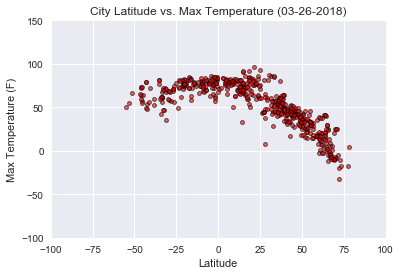

In [17]:
#Set data
x = lats
y = temps

#Set parameters
sns.set()
plt.xlim(-100,100)
plt.ylim(-100,150)
plt.title("City Latitude vs. Max Temperature ("+now+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Plot
plt.scatter(x, y, s=15,c="red",alpha=0.6, linewidth=1,edgecolors="black")

Latitude vs Wind Speed

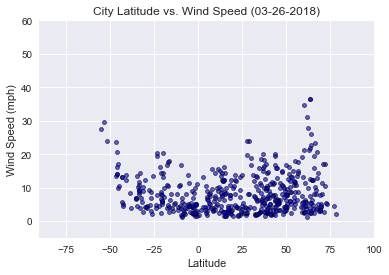

In [18]:
#Set data
x = lats
y = winds

#Set parameters
sns.set()
plt.xlim(-90,100)
plt.ylim(-5,60)
plt.title("City Latitude vs. Wind Speed ("+now+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Plot
plt.scatter(x, y,s=15,c="blue",alpha=0.6, linewidth=1,edgecolors="black")

Latitude vs Cloudiness

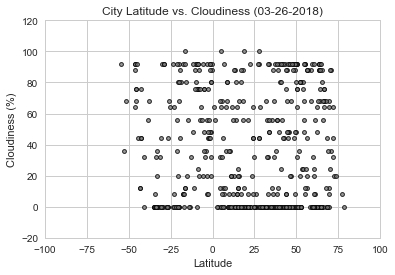

In [19]:
#Set data
x = lats
y = clouds

#Set parameters
sns.set_style("whitegrid")
plt.xlim(-100,100)
plt.ylim(-20,120)
plt.title("City Latitude vs. Cloudiness ("+now+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Plot
plt.scatter(x, y,s=15, c="grey",alpha=0.8, linewidth=1,edgecolors="black")

Latitude vs Humidity

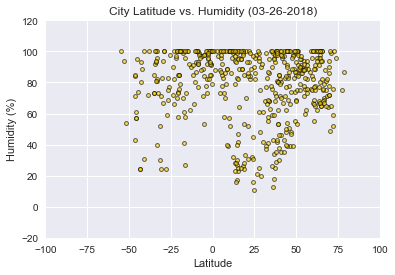

In [20]:
#Set data
x = lats
y = humids

#Set parameters
sns.set()
plt.xlim(-100,100)
plt.ylim(-20,120)
plt.title("City Latitude vs. Humidity ("+now+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Plot
plt.scatter(x, y,s=15, c="gold",alpha=0.6, linewidth=1,edgecolors="black") 